In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline

In [3]:
np.random.seed(11)

In [4]:
df = pd.read_csv('./iris.data', header=None)

In [5]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data = df.as_matrix()

In [7]:
data.shape

(150, 5)

Get data with each label for further processing

In [8]:
data_setosa = data[data[:,4] == 'Iris-setosa']
data_versicolor = data[data[:,4] == 'Iris-versicolor']
data_virginica = data[data[:,4] == 'Iris-virginica']

In [9]:
print data_setosa.shape
print data_versicolor.shape

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-9-f6f8a4e4f303>, line 1)

# Aufgabe 1 Perzeptron

In [13]:
class Perceptron:
        
    def fit(self, X, y):
        self.w = np.random.rand(X.shape[1])
        mistake_lst = self._find_mistake(X, y)
        
        # we use the number of wrongly classified points to decide whether finishing our training or not.
        while len(mistake_lst) > 0:
            for index in mistake_lst:
                
                # every time we update the w, we will check whether the wrongly classified data in mistake list is still
                # wrongly classified or not.
                if not self._check_one(X, index, y):
                    self._update_w(X, index, y)
                else:
                    continue
                    
            # every time we finish loopping through the mistake list, we will update our mistake list to check
            # whether there is any wrongly classified data point after keeping updating the w
            mistake_lst = self._find_mistake(X, y)
      
    # only check whether one single point is correctly or wrongly classified
    def _check_one(self, X, index,y):
        if X[index].dot(self.w)*y[index] > 0:
            return True
        else:
            return False
    
    # update w
    def _update_w(self, X, index, y):
        self.w = self.w + X[index]*y[index]
    
    # predict one single point
    def _predict_one(self, x):
        return x.dot(self.w)
    
    # using current w to obtain a mistake list, 
    # which includes all the wrongly classified data point index
    def _find_mistake(self, X, y):
        mistake_lst = []
        
        for i in range(len(X)):
            prediction = self._predict_one(X[i])
            if prediction*y[i] < 0:
                mistake_lst.append(i)
        return mistake_lst
                
    def predict(self, X):
        result = X.dot(self.w)
        result[result > 0] = 1
        result[result < 0] = -1
        
        return result
    
    def score(self, X, y):
        result = X.dot(self.w).reshape(y.shape) * y
        print result.shape
        return np.mean(result > 0)
    

Following the homework description, using label setosa and versicolor. Combine these two data set and generate corresponding label for them.

In [14]:
X = np.concatenate((data_setosa[:,:4], data_versicolor[:,:4]))
X = np.concatenate((np.ones((X.shape[0],1)), X), axis = 1)
y_setosa = -1 * np.ones((50,1))
y_versicolor = 1 * np.ones((50,1))

y = np.concatenate((y_setosa, y_versicolor), axis = 0)

Split the data set into training set and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 11)

In [16]:
c = Perceptron()

In [17]:
c.fit(X_train, y_train)

In [18]:
c.predict(X_test)

array([-1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1], dtype=object)

In [19]:
c.score(X_test, y_test)

(20, 1)


1.0

# Aufgabe 2 Pocket Perzeptron

In [20]:
class PocketPerceptron():
    def fit(self, X, y, num_iterations = 1000):
        self.w = np.random.rand(X.shape[1])
        mistake_lst = self._find_mistake(X, y)
        
        # counter is to control the number of iterations
        counter = 0
        while len(mistake_lst) > 0 and counter < num_iterations:
            for index in mistake_lst:
                
                # use tmp_w to store the candidate w. Whether we will update our current w or not,
                # depends on the performance comparision between tmp_w and self.w
                tmp_w = self.w + X[index]*y[index]
                
                # performance comparision
                if self._check_all(X, self.w, y) >= self._check_all(X, tmp_w, y):
                    self._update_w(X, index, y)
                    
            # after one loop, update the counter and update the mistake list
            counter += 1
            mistake_lst = self._find_mistake(X, y)

    
    def _check_one(self, X, index,y):
        if X[index].dot(self.w)*y[index] > 0:
            return True
        else:
            return False
        
    # _check_all will return the number of wrongly classified data points
    def _check_all(self, X, weight, y):
        return np.sum(X.dot(weight).reshape(y.shape)*y < 0)
    
    
    def _update_w(self, X, index, y):
        self.w = self.w + X[index]*y[index]
    
    def _predict_one(self, x):
        return x.dot(self.w)
    
    def _find_mistake(self, X, y):
        mistake_lst = []
        
        for i in range(len(X)):
            prediction = self._predict_one(X[i])
            if prediction*y[i] < 0:
                mistake_lst.append(i)
        return mistake_lst
                
    def predict(self, X):
        result = X.dot(self.w)
        result[result > 0] = 1
        result[result < 0] = -1
        
        return result
    
    def score(self, X, y):
        result = X.dot(self.w).reshape(y.shape) * y
        print result.shape
        return np.mean(result > 0)

In [21]:
X = np.concatenate((data_versicolor[:,:4], data_virginica[:,:4]))
X = np.concatenate((np.ones((X.shape[0],1)), X), axis = 1)
y_versicolor = -1 * np.ones((50,1))
y_virginica = 1 * np.ones((50,1))

y = np.concatenate((y_versicolor, y_virginica), axis = 0)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [23]:
pc = PocketPerceptron()

In [24]:
pc.fit(X_train,y_train)

In [25]:
pc.score(X_test, y_test)

(20, 1)


0.75

# Play around the data

Using sklearn pca, I reduce the dimensions for a better visulization

## Visualise Pecptron result

In [48]:
from sklearn.decomposition import PCA

In [49]:
X = np.concatenate((data_setosa[:,:4], data_versicolor[:,:4]))
y_setosa = -1 * np.ones((50,1))
y_versicolor = 1 * np.ones((50,1))

y = np.concatenate((y_setosa, y_versicolor), axis = 0)

In [50]:
X.shape

(100, 4)

In [51]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [52]:
X = np.concatenate((np.ones((X.shape[0],1)), X), axis = 1)

In [53]:
type_one_X = X[:50,:]
type_two_X = X[50:,:]

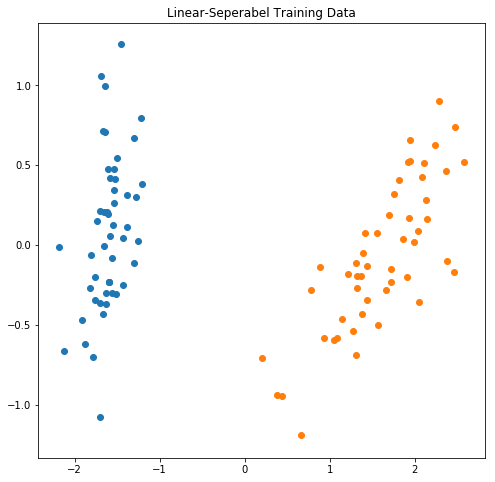

In [54]:
plt.figure(figsize=(8,8))
plt.title('Linear-Seperabel Training Data')
plt.scatter(type_one_X[:,1], type_one_X[:,2])
plt.scatter(type_two_X[:,1], type_two_X[:,2])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 11)

In [56]:
c = Perceptron()
c.fit(X_train, y_train)

In [57]:
x = np.linspace(-1.5,1.5,num=100)
y = c.w[0] + x * c.w[1] + x * c.w[2]

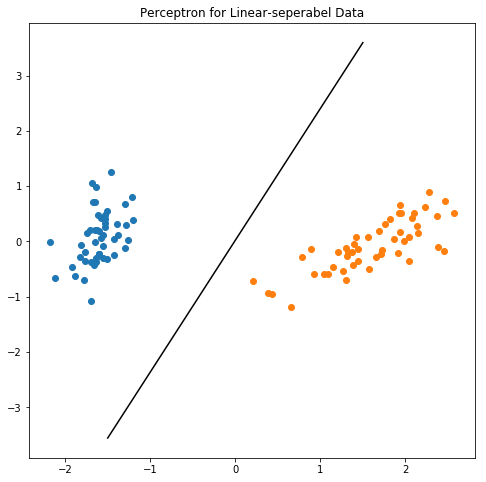

In [58]:
plt.figure(figsize=(8,8))
plt.title('Perceptron for Linear-seperabel Data')
plt.scatter(type_one_X[:,1], type_one_X[:,2])
plt.scatter(type_two_X[:,1], type_two_X[:,2])

plt.plot(x, y, color = 'black')

## Visualise Pocket Perceptron

In [59]:
X = np.concatenate((data_versicolor[:,:4], data_virginica[:,:4]))
y_versicolor = -1 * np.ones((50,1))
y_virginica = 1 * np.ones((50,1))

y = np.concatenate((y_versicolor, y_virginica), axis = 0)

In [60]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [61]:
X = np.concatenate((np.ones((X.shape[0],1)), X), axis = 1)

In [62]:
type_one_X = X[:50,:]
type_two_X = X[50:,:]

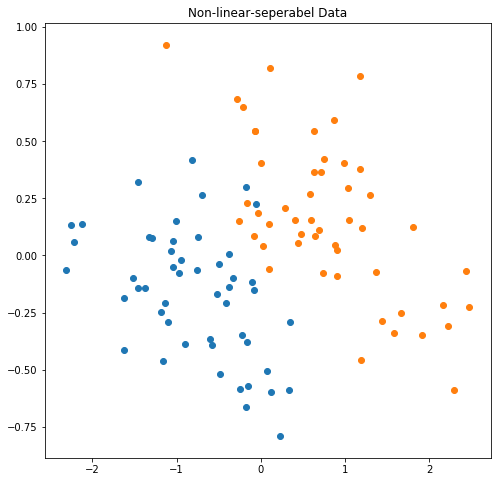

In [63]:
plt.figure(figsize=(8,8))
plt.title('Non-linear-seperabel Data')
plt.scatter(type_one_X[:,1], type_one_X[:,2])
plt.scatter(type_two_X[:,1], type_two_X[:,2])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [65]:
pc = PocketPerceptron()

In [66]:
pc.fit(X_train,y_train)

In [67]:
x = np.linspace(-1.5,1.5,num=100)
y = c.w[0] + x * c.w[1] + x * c.w[2]

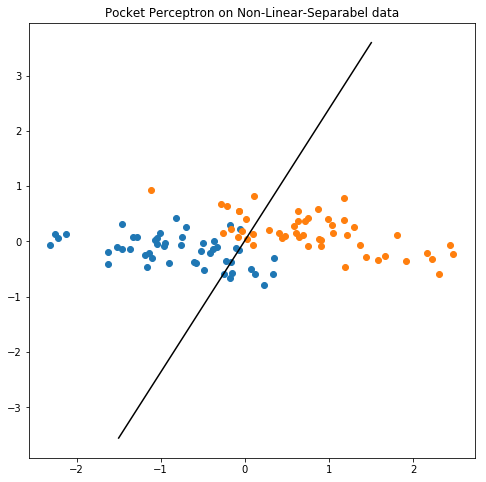

In [68]:
plt.figure(figsize=(8,8))
plt.title('Pocket Perceptron on Non-Linear-Separabel data')
plt.scatter(type_one_X[:,1], type_one_X[:,2])
plt.scatter(type_two_X[:,1], type_two_X[:,2])

plt.plot(x, y, color = 'black')